In [2]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [30]:
df = pd.read_csv('prisonData1.csv')
one_hot_df = pd.read_csv('oneHotDfAllCols.csv')

print(len(one_hot_df))

7191471


In [ ]:
# decision tree classifer on all data
# get a list of all columns in the dataframe
feature_cols = list(df.columns.values)
print(feature_cols[:-1])

X = df[feature_cols[:-1]] # Features
y = df.TIMESRVD # Target variable

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# decision tree classifier on only a few features
feature_cols = ['SEX', 'STATE', 'EDUCATION', 'OFFDETAIL', 'RACE', 'AGEADMIT']

X = df[feature_cols] # Features
y = df.TIMESRVD # Target variable

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [29]:
# random forest regression on a subset of features
# get a list of all columns in the dataframe
feature_cols = list(one_hot_df.columns.values)
# remove 'STATE', 'RACE', 'OFFDETAIL', 'ADMTYPE', 'OFFGENERA'L, 'ADMITYR', 'SENTLGTH', 'RELYR', 'RELTYPE','AGERLSE','TIMESRVD' from the list
feature_cols.remove('STATE')
feature_cols.remove('RACE')
feature_cols.remove('OFFDETAIL')
feature_cols.remove('ADMTYPE')
feature_cols.remove('OFFGENERAL')
feature_cols.remove('ADMITYR')
feature_cols.remove('SENTLGTH')
feature_cols.remove('RELYR')
feature_cols.remove('RELTYPE')
feature_cols.remove('AGERLSE')
feature_cols.remove('TIMESRVD')
feature_cols.remove('Unnamed: 0')

# feature_cols = ['SEX', 'STATE', 'EDUCATION', 'OFFDETAIL', 'RACE', 'AGEADMIT']

X = one_hot_df[feature_cols] # Features
y = one_hot_df.TIMESRVD # Target variable

# split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

rf = RandomForestRegressor()
history = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


# try a linear regression 
# see how a non-linear model fares compared to a linear model 
# a neural network might be cool to see, can use sklearn's MLPRegressor

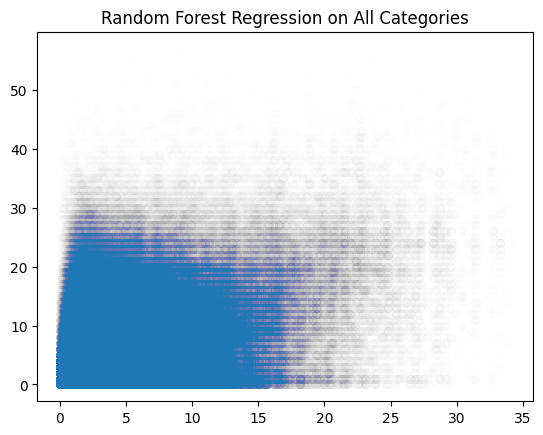

Mean Absolute Error: 1.520837367301887


<Figure size 640x480 with 0 Axes>

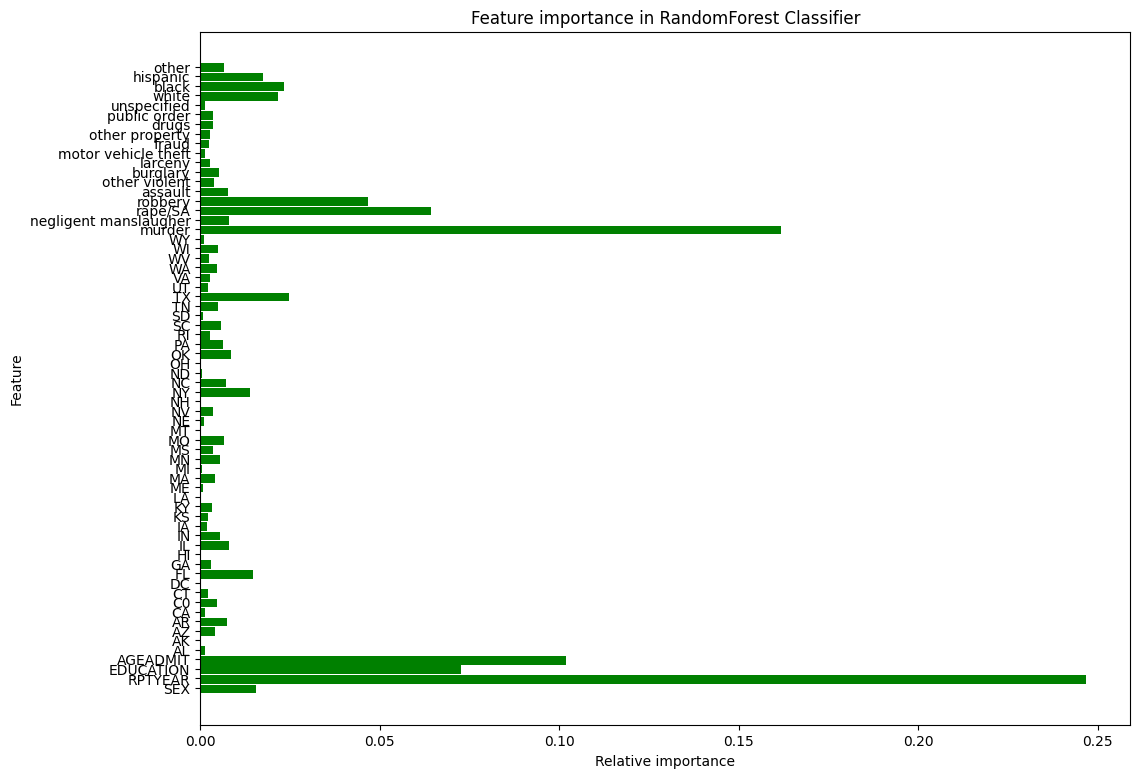

<Figure size 500x500 with 0 Axes>

In [28]:
# plot random forest regression output 

plt.scatter(y_pred, y_test, alpha=(0.002))
# add title
plt.title("Random Forest Regression on All Categories")
plt.show()
# save the plot
plt.savefig('random_forest_regression_all_cats.png', dpi=100, bbox_inches='tight')

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + str(mae))

# plot of feature importances
y = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.9
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(feature_cols, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(12, 9, forward=True)
plt.savefig('feature_importance_all_cats.png', dpi=100, bbox_inches='tight')

In [33]:
years = []
drug_sent = []
publicorder_sent = []
murder_sent = []
rape_sent = [] 
fraud_sent = []
assault_sent = [] 
motor_theft_sent = []


def avg_sentence(offense, year):
    year_data = one_hot_df[one_hot_df['RPTYEAR'] == year]
    offense_data = year_data[year_data[offense] == 1]
    avg_sent_len = offense_data['TIMESRVD'].mean()
    return avg_sent_len

for year in one_hot_df['RPTYEAR'].unique():
    years.append(year)
    drug_sent.append(avg_sentence('drugs', year))
    publicorder_sent.append(avg_sentence('public order', year))
    murder_sent.append(avg_sentence('murder', year))
    rape_sent.append(avg_sentence('rape/SA', year))
    fraud_sent.append(avg_sentence('fraud', year))
    assault_sent.append(avg_sentence('assault', year))
    motor_theft_sent.append(avg_sentence('motor vehicle theft', year))


/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_16996/900879681.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 4)
/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_16996/900879681.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 5)
/var/folders/v1/ljzyxbgj1xx_syzq56dgnsk00000gn/T/ipykernel_16996/900879681.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 6)


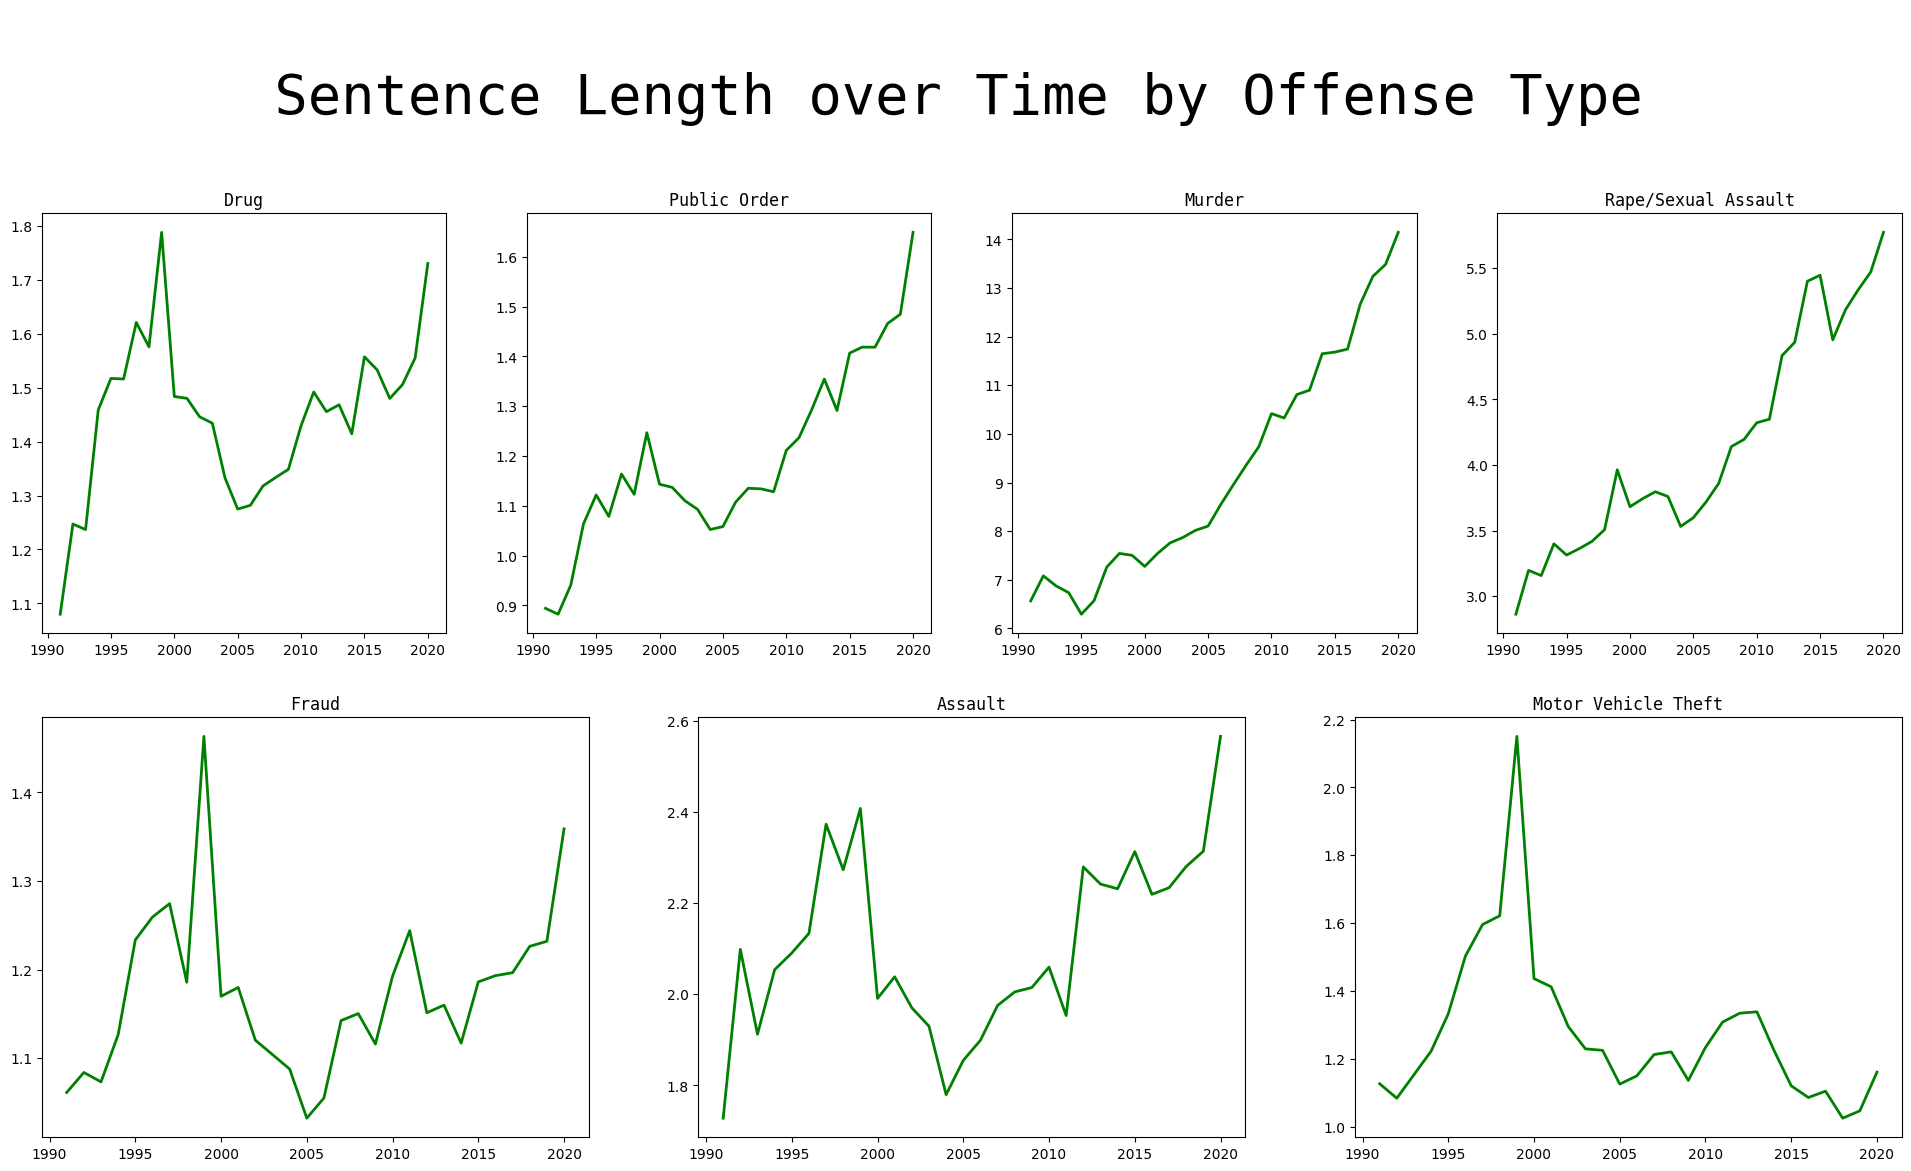

In [75]:

font = {'fontname':'monospace'}

plt.subplots(2, 4, figsize=(24,12))

plt.subplot(2, 4, 1)
plt.plot(years, drug_sent, linewidth=2.0, color='green')
plt.title('Drug', **font)

plt.subplot(2, 4, 2)
plt.plot(years, publicorder_sent, linewidth=2.0, color='green')
plt.title('Public Order', **font)

plt.subplot(2, 4, 3)
plt.plot(years, murder_sent, linewidth=2.0, color='green')
plt.title('Murder', **font)

plt.subplot(2, 4, 4)
plt.plot(years, rape_sent, linewidth=2.0, color='green')
plt.title('Rape/Sexual Assault', **font)

plt.subplot(2, 3, 4)
plt.plot(years, fraud_sent, linewidth=2.0, color='green')
plt.title('Fraud', **font)

plt.subplot(2, 3, 5)
plt.plot(years, assault_sent, linewidth=2.0, color='green')
plt.title('Assault', **font)

plt.subplot(2, 3, 6)
plt.plot(years, motor_theft_sent, linewidth=2.0, color='green')
plt.title('Motor Vehicle Theft', **font)

plt.suptitle('\n Sentence Length over Time by Offense Type', y=1.05, **font, fontsize=40)
plt.savefig('SentenceLengthOverTime.png', dpi=100, bbox_inches='tight')


In [ ]:
# random forest regressor on onehot encoded data

# create a list of columns including everything but TIMESRVD
feature_cols = one_hot_df.columns.tolist()
feature_cols.remove('TIMESRVD')

# randomly select 100,000 rows from the dataframe
one_hot_df_sample = one_hot_df.sample(n=100000)

X = one_hot_df_sample[feature_cols] # Features
y = one_hot_df_sample.TIMESRVD # Target variable

# split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestRegressor()
history = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
plt.scatter(y_pred, y_test)
plt.show()

plt.scatter(y_pred, y_test, alpha=(0.05))
plt.show()

mae = np.mean(abs(y_pred - y_test))
print(mae)

# plot of feature importances
y = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.9
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(feature_cols, minor=False)
plt.title('Feature importance in RandomForest Classifier OneHot')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(12, 9, forward=True)
plt.savefig('feature_importance_all_cats.png', dpi=100, bbox_inches='tight')
